In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [8]:
df=pd.read_csv('50_Startups.csv')

In [9]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df.values[:,3]

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.shape

(50, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
#chk for missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# CORRELATION MATRIX

In [10]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


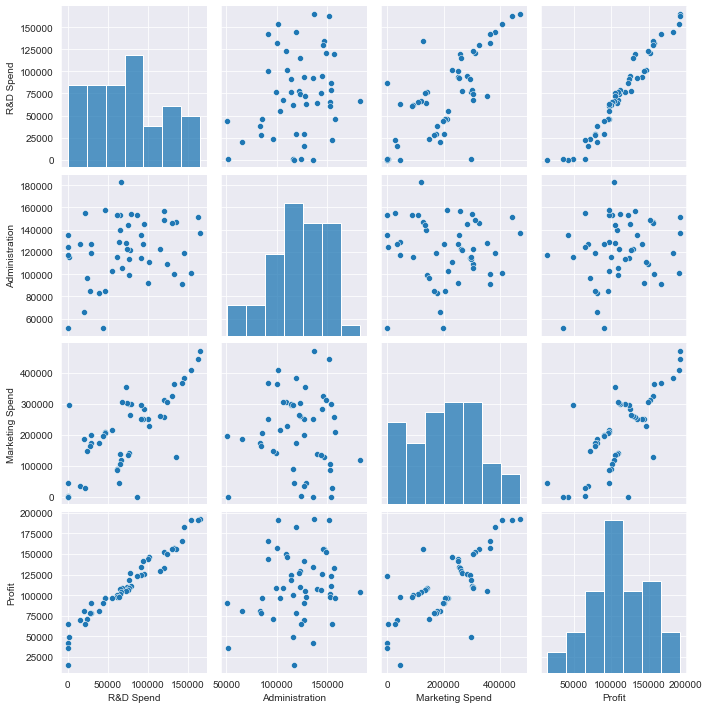

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

# MODEL BUILDING

In [12]:
df=df.rename(columns={'R&D Spend':'rdspend','Marketing Spend':'marketingspend','Profit':'profit','State':'state','Administration':'administration'})

In [13]:
df.head(0)

,rdspend,administration,marketingspend,state,profit


In [14]:
#Profit is my target variable followed by independent varibles R&D Spend, Administration,Marketing Spend, State        
model=smf.ols('profit~rdspend+administration+marketingspend',data=df).fit()

In [15]:
model.params

Intercept         50122.192990
rdspend               0.805715
administration       -0.026816
marketingspend        0.027228
dtype: float64

In [16]:
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
rdspend           17.846374
administration    -0.525507
marketingspend     1.655077
dtype: float64 
 Intercept         1.057379e-09
rdspend           2.634968e-22
administration    6.017551e-01
marketingspend    1.047168e-01
dtype: float64


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        18:26:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rdspend            0.8057      0.045     17.846      0.000       0.715       0.897
administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketingspend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# so the variables administration & marketingspend both are insignificiat variables
# Cross check with individual variables to find out the significance

In [19]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# SLR MODEL

In [20]:
ml_ad=smf.ols('profit~administration',data=df).fit()

In [21]:
print(ml_ad.pvalues)

Intercept         0.003824
administration    0.162217
dtype: float64


In [22]:
ml_mar=smf.ols('profit~marketingspend',data=df).fit()

In [23]:
print(ml_mar.pvalues)

Intercept         4.294735e-10
marketingspend    4.381073e-10
dtype: float64


Since P value of the variable Marketing_Spend is < than 0.05 so this is significiat variable and can accept this variable

# MODEL VALIDATION TECHNIQUE
RESIDUAL ANALYSIS - TEST FOR NORMALITY OF RESIDUAL

In [24]:
import statsmodels.api as sm

In [25]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Normal Q-Q Plot of residuals')

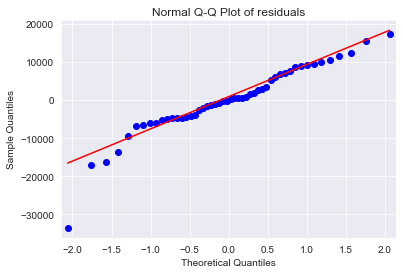

In [26]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q Plot of residuals')

# RESIDUAL PLOT FOR HOMOSCEDASTICITY

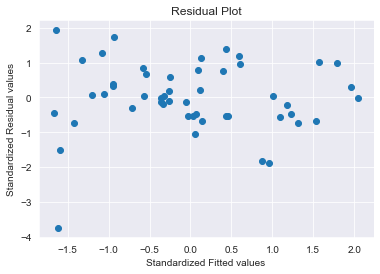

In [27]:
def zscore(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(zscore(model.fittedvalues),zscore(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual values')
sns.set_style(style='whitegrid')

# RESIDUAL VS REGRESSOR

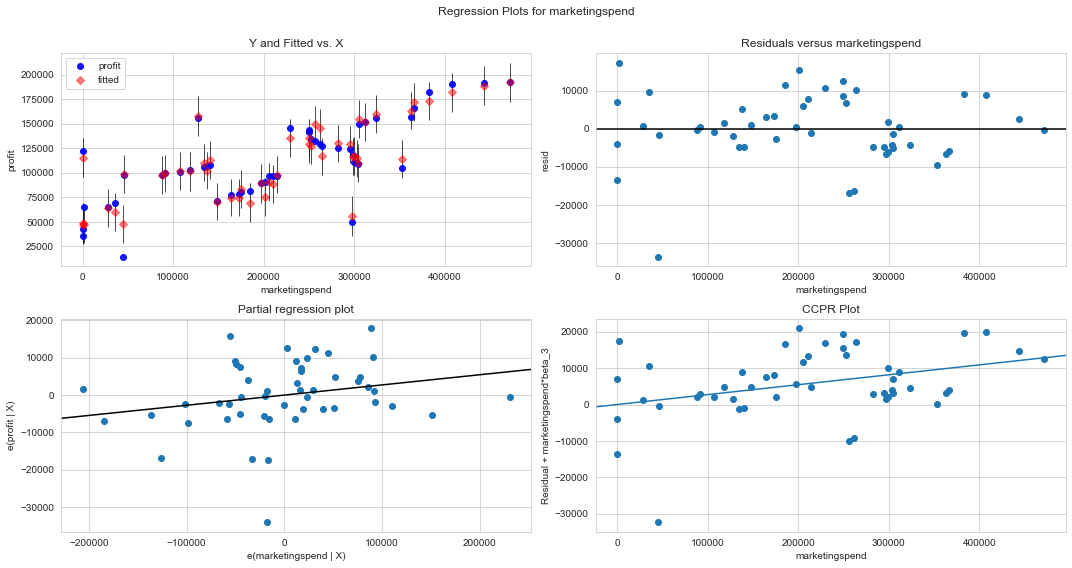

In [28]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'marketingspend',fig=fig)

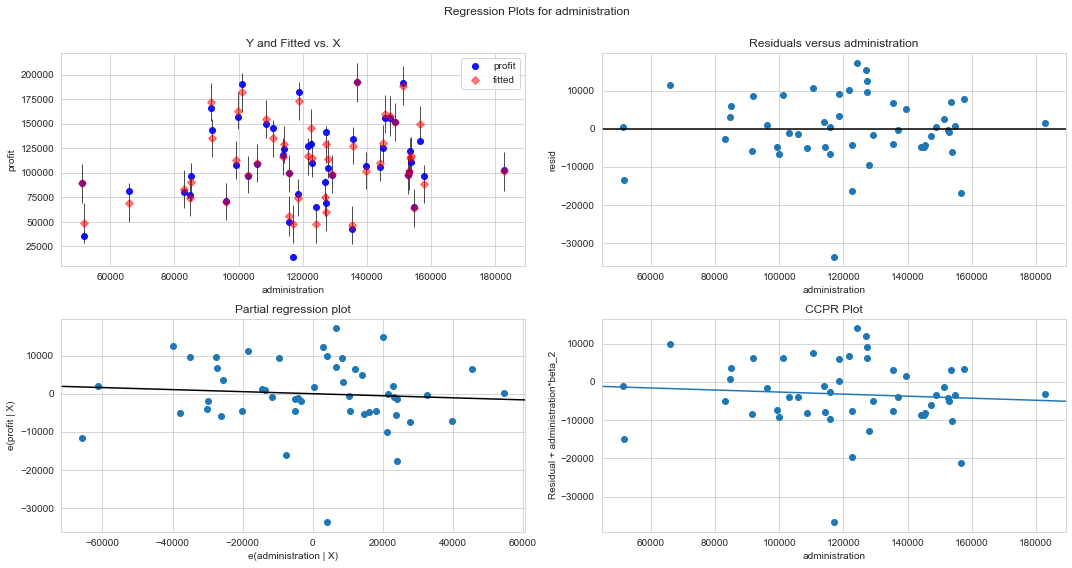

In [29]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'administration',fig=fig)

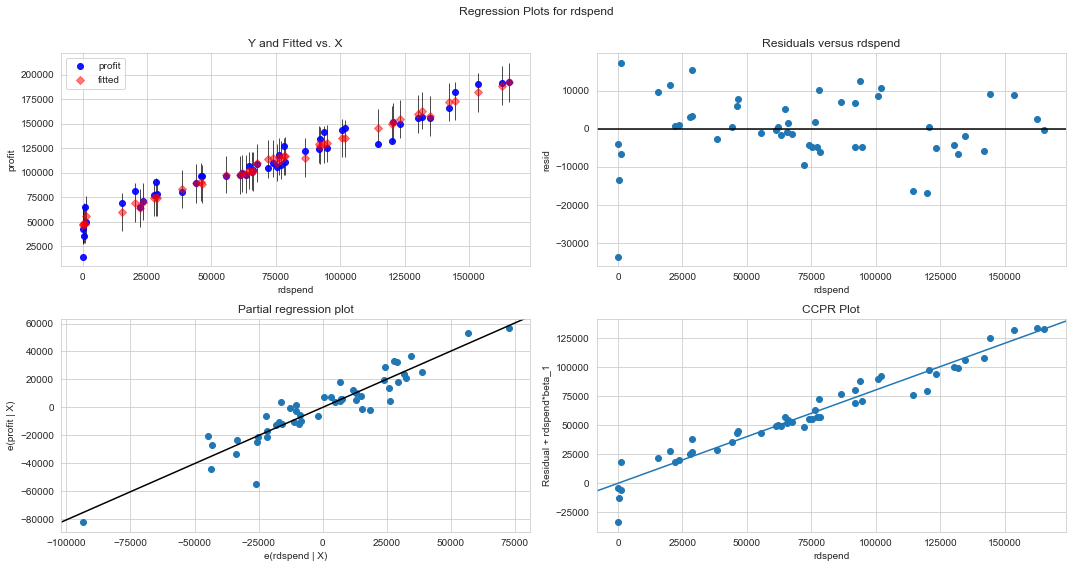

In [30]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'rdspend',fig=fig)

# MODEL DELETION DIAGNOSTICS
DELECTING INFLUENCERS / OUTLIERS -
COOK'S DISTANCE

In [33]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

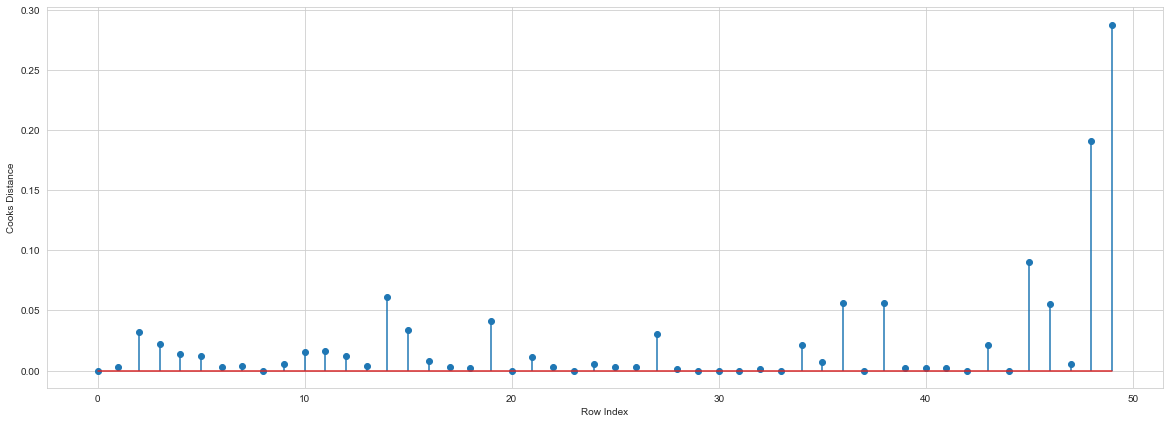

In [34]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# HIGH INFLUENCE POINTS - LEVERAGE VALUE

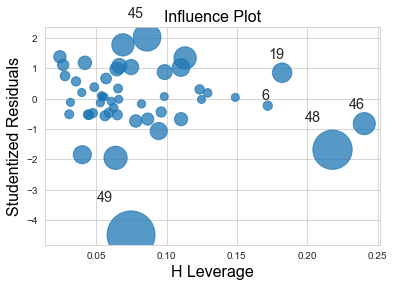

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [41]:
k=3
n=df.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.24

In [42]:
df[df.index.isin([49,46])]

,rdspend,administration,marketingspend,state,profit
46,1315.46,115816.21,297114.46,Florida,49490.75
49,0.00,116983.80,45173.06,California,14681.40


# NOT DISCARDING ANY DATA POINTS AS NO INFLUENCER'S
COOK'S DISTANCE IS NOT MORE THAN 1 SO NO OUTLIERS FOUND BY COOK'S DISTANCE PLOT. 
LEVERAGE PLOT K VALUE IS 0.24 I DOUBT DATA POINT 46 IS BEYOND 0.24

# FINAL MODEL BUILDING

In [45]:
final_model=smf.ols('profit~rdspend+marketingspend',data=df).fit()

In [46]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           2.16e-31
Time:                        19:21:13   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rdspend            0.7966      0.041     19.266      0.000       0.713       0.880
marketingspend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# PREDICTION

In [49]:
newdata = pd.DataFrame({"rdspend":1646,"administration":60000,"marketingspend":3000},index=[1])

In [50]:
final_model.predict(newdata)

1    48376.765183
dtype: float64